In [20]:
# Import the libraries requried
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
df = pd.read_csv('Iris.csv').drop(columns=['Id']) # Load the iris dataset

In [22]:
# Simple mapping to Clustering the species
df['Species'] = df['Species'].map(
    {
        'Iris-setosa' : 0,
        'Iris-versicolor' : 1,
        'Iris-virginica' : 2
    }
)

In [23]:
df # Check whether data is in desired format or not.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [24]:
df.info() # Quick summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [25]:
# We do this as numpy is more flexible than dataframes.
X = df.iloc[:,:].values # To convert the dataframe to a numpy array

In [26]:
# Import the KMeans from cluster module
from sklearn.cluster import KMeans

In [27]:
# WCSS stands for Within-Cluster Sum of Squares
#  It is calculated by summing the squared distance between each data point and the centroid of the cluster to which it belongs.
# We are gonna store the wcss of some cluster points and use these to find the optimal number of cluster using the elbow diagram.
wcss = []

In [28]:
# Run a for loop from 1 to n(typically values between 1 and 25) to store the wcss value for the elbow diagram.
for x in range(1,15):
    k_m = KMeans(n_clusters=x)
    k_m.fit_predict(df)
    wcss.append(k_m.inertia_)

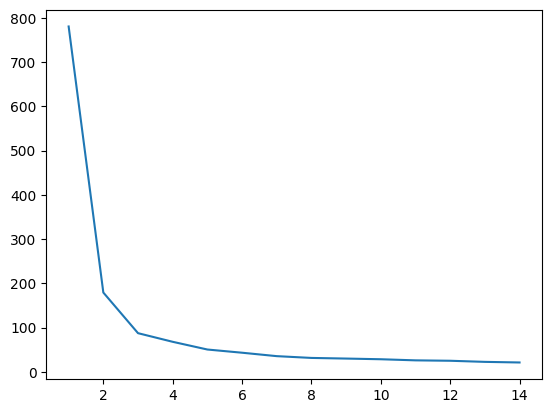

In [29]:
# The elbow diagram is used to find the elbow or the the second degree derivative where the graph changes drastically before entering 
# a stable state. We can use this to calculate the k value for the KMeans which help us to determine the optimal number of cluster for 
# our analysis.
plt.plot(
    range(1,15), # The x axis is the range(same as give in for loop)
    wcss # The wcss values for the k values respectively.
)
plt.show()

In [30]:
# Therefore the optimum value of k is 3 as we can see in the graph

In [31]:
km = KMeans(n_clusters=3) # Now Instantiate the model with the perfect k

In [32]:
labels = km.fit_predict(X) # Fit predict values as we are now dealing with Unsupervised learning models 
# Also this takes one parameter and the output is actually the predicted labels.

In [33]:
labels # The predicted labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

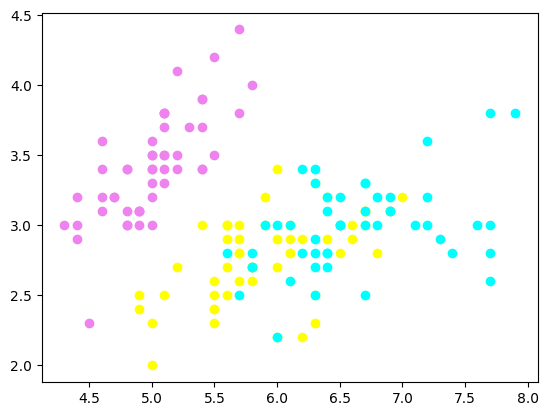

In [34]:
# Now we will plot this labels using an interesting hack .
# syntax : plt.scatter(
#                       x = X[labels == comparing_labels , column_no1]
#                       y = X[labels == comparing_labels , column_no2]
#                       # If more variables(columns) we can use shape and marker style also.
#                       )
plt.scatter(X[labels == 0,0],X[labels == 0,1],color='yellow')
plt.scatter(X[labels == 1,0],X[labels == 1,1],color='violet')
plt.scatter(X[labels == 2,0],X[labels == 2,1],color='cyan')
plt.show()

In [35]:
import plotly.express as px
fig = px.scatter_3d(
                    x=X[:,0],
                    y=X[:,1],
                    z=X[:,2],
                    color = labels
                    )
fig.show()

In [ ]:
# For N dimensional data we can use PCA for visualization.